# Task 4: ANN Modeling with KERAS

Members: Lars Olav Thorbjørnsen, Stein Are Årsnes og Sanjai Vijeyaratnam

### Abstract

This part of the project aims to create an Artificial Neural Network (ANN) machine learning algorithm to model and predict the Vp values based on the the different DEN, Vs and NEU values we have. By creating three layers with five nodes each, the goal will be to have the model learn from the data and it's mistakes to improve and predict better. 
We use the cleaned data, splitting it into two different parts so we can first train it, feeding it data so it can learn the patterns of it. Then we test it, letting it make a prediction before feeding it the actual results, letting it use back-propogation to improve. From our findings, it seems the model is fairly accurate, but it does overshoot, usually predicting a higher value than the actual results. It does still follow the pattern and trend of the data, proving that it is able to see the pattern of the data after training. 

### Introduction

Artificial Neural Network (ANN) are machine learning algorithms that contains layers and nodes to analyze and learn patterns in data. Similar to the brain and it's nervous system, ANN uses nodes to recieve input, analyze it, then pass it on to other nodes in the next layer, continuing this process until it arrives at a estimate. Then it will get the actual result and use back-propagation, a way of using the result to see where it went wrong and improve, fine tuning its findings to become better. 

In this part, we will find the Compressional Wave Velocity (Vp) based on data consisting of Shear Wave Velocity (Vs), Bulk Density (DEN), and Neutron Porosity (NEU) using ANN, so that we can make accurate predictions without worrying about mapping or using reggresion functions. We will use the pre-processed data to train and test the algorithm, hoping that its three layers will suffice in allowing it to learn the pattern of the data. We will then compare it to the actual results of the Vp to see how well it did. 

Importing the necessary data to create the ANN model

In [1]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

CleanedData = pd.read_excel('CleanedFeatureSelectedFiltered.xlsx')

TargetVariable = ['Vp']
Predictors = [['Vs'], ['DEN'], ['NEU'], 
              ['Vs', 'DEN'], ['Vs', 'NEU'], ['DEN', 'NEU'], 
              ['Vs', 'DEN', 'NEU']]

optimizers = ['adam', 'rmsprop']
activation_functions = {
    'relu': 'relu',
    'leaky_relu': LeakyReLU(alpha=0.1), 
    'swish': 'swish'
}

c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


We load the cleaned dataset containing geological features to predict the Compressional Wave Velocity (Vp). We define the target variable (Vp) and several combinations of predictors (e.g., Shear Wave Velocity (Vs), Bulk Density (DEN), Neutron Porosity (NEU)). Additionally, we set up various optimizers (adam, rmsprop) and activation functions (relu, leaky_relu, swish) that will be tested in the ANN models. These combinations will allow us to explore how different inputs and model configurations affect the prediction accuracy.

In [2]:
def create_ann_model(input_dim, optimizer, activation):
    model = Sequential()
    model.add(Dense(units=5, input_dim=input_dim, kernel_initializer='normal', activation=activation))
    model.add(Dense(units=5, kernel_initializer='normal', activation=activation))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

This is the function we will use to create the ANN models. The ANN models contain three layers, with two of which containing five nodes. This function is used to call on with different optimizers and activation functions, and it also compiles the losses with the mean squared error function to make it suitable for regression. 

In [3]:
results = {}

# Loop through predictors, optimizers, and activation functions
for predictor_set in Predictors:
    X = CleanedData[predictor_set].values
    y = CleanedData[TargetVariable].values
    
    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()
    
    X = PredictorScaler.fit_transform(X)
    y = TargetVarScaler.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for opt in optimizers:
        for act_name, act in activation_functions.items():
            model_name = f"{predictor_set}_{opt}_{act_name}"
            
            model = create_ann_model(input_dim=X_train.shape[1], optimizer=opt, activation=act)
          
            history = model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=0)
            
            test_loss = model.evaluate(X_test, y_test, verbose=0)
            predictions = model.predict(X_test)
            r2 = r2_score(y_test, predictions)
            
            results[model_name] = r2
            print(f"Model: {model_name}, R2 Score: {r2}")

c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['Vs']_adam_relu, R2 Score: 0.7120672215768753


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Model: ['Vs']_adam_leaky_relu, R2 Score: 0.706130342300733


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Model: ['Vs']_adam_swish, R2 Score: 0.714162244423984


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['Vs']_rmsprop_relu, R2 Score: 0.7089157607265244


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model: ['Vs']_rmsprop_leaky_relu, R2 Score: 0.7082833985912897


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model: ['Vs']_rmsprop_swish, R2 Score: 0.7212356473264453


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['DEN']_adam_relu, R2 Score: 0.8530910765717752


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['DEN']_adam_leaky_relu, R2 Score: 0.861762997174218


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model: ['DEN']_adam_swish, R2 Score: 0.8426946624536088


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['DEN']_rmsprop_relu, R2 Score: -2.7335394169103466e-05


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['DEN']_rmsprop_leaky_relu, R2 Score: 0.8059314527127913


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Model: ['DEN']_rmsprop_swish, R2 Score: 0.8307111359193071


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['NEU']_adam_relu, R2 Score: 0.8386970249421227


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['NEU']_adam_leaky_relu, R2 Score: 0.855793424162536


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model: ['NEU']_adam_swish, R2 Score: 0.8535014349287395


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Model: ['NEU']_rmsprop_relu, R2 Score: 0.8415409869816538


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['NEU']_rmsprop_leaky_relu, R2 Score: 0.8400113123557573


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model: ['NEU']_rmsprop_swish, R2 Score: 0.8335147206186541


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['Vs', 'DEN']_adam_relu, R2 Score: 0.9848811777661473


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['Vs', 'DEN']_adam_leaky_relu, R2 Score: 0.9868575532805819


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model: ['Vs', 'DEN']_adam_swish, R2 Score: 0.9851800263213464


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['Vs', 'DEN']_rmsprop_relu, R2 Score: 0.9837911325967674


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['Vs', 'DEN']_rmsprop_leaky_relu, R2 Score: 0.9860229040446536


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model: ['Vs', 'DEN']_rmsprop_swish, R2 Score: 0.9849852178924439


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['Vs', 'NEU']_adam_relu, R2 Score: 0.9778840871639652


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Model: ['Vs', 'NEU']_adam_leaky_relu, R2 Score: 0.9775921697803583


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model: ['Vs', 'NEU']_adam_swish, R2 Score: 0.9688636970189258


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Model: ['Vs', 'NEU']_rmsprop_relu, R2 Score: 0.976080788188019


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['Vs', 'NEU']_rmsprop_leaky_relu, R2 Score: 0.9767499117736524


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model: ['Vs', 'NEU']_rmsprop_swish, R2 Score: 0.9745822577381583


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['DEN', 'NEU']_adam_relu, R2 Score: 0.9195696887086287


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model: ['DEN', 'NEU']_adam_leaky_relu, R2 Score: 0.9227128003404197


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['DEN', 'NEU']_adam_swish, R2 Score: 0.9045978835348328


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['DEN', 'NEU']_rmsprop_relu, R2 Score: 0.9132878227292675


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['DEN', 'NEU']_rmsprop_leaky_relu, R2 Score: 0.918716704910724


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['DEN', 'NEU']_rmsprop_swish, R2 Score: 0.9014230519186739


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['Vs', 'DEN', 'NEU']_adam_relu, R2 Score: 0.9888542327167


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['Vs', 'DEN', 'NEU']_adam_leaky_relu, R2 Score: 0.9888796341639504


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['Vs', 'DEN', 'NEU']_adam_swish, R2 Score: 0.9872514174034082


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['Vs', 'DEN', 'NEU']_rmsprop_relu, R2 Score: 0.9889796098541022


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ['Vs', 'DEN', 'NEU']_rmsprop_leaky_relu, R2 Score: 0.9884449807966164


c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: ['Vs', 'DEN', 'NEU']_rmsprop_swish, R2 Score: 0.9875896147130712


This section of the code performs training and evaluation of different ANN models. It loops through various combinations of predictor sets, optimizers, and activation functions. For each combination, it standardizes the data and split it into training and testing sets, calls the function and trains it for 500 epochs and then tested and evaluated with a $R^2$ score. The results are printed and stored. 

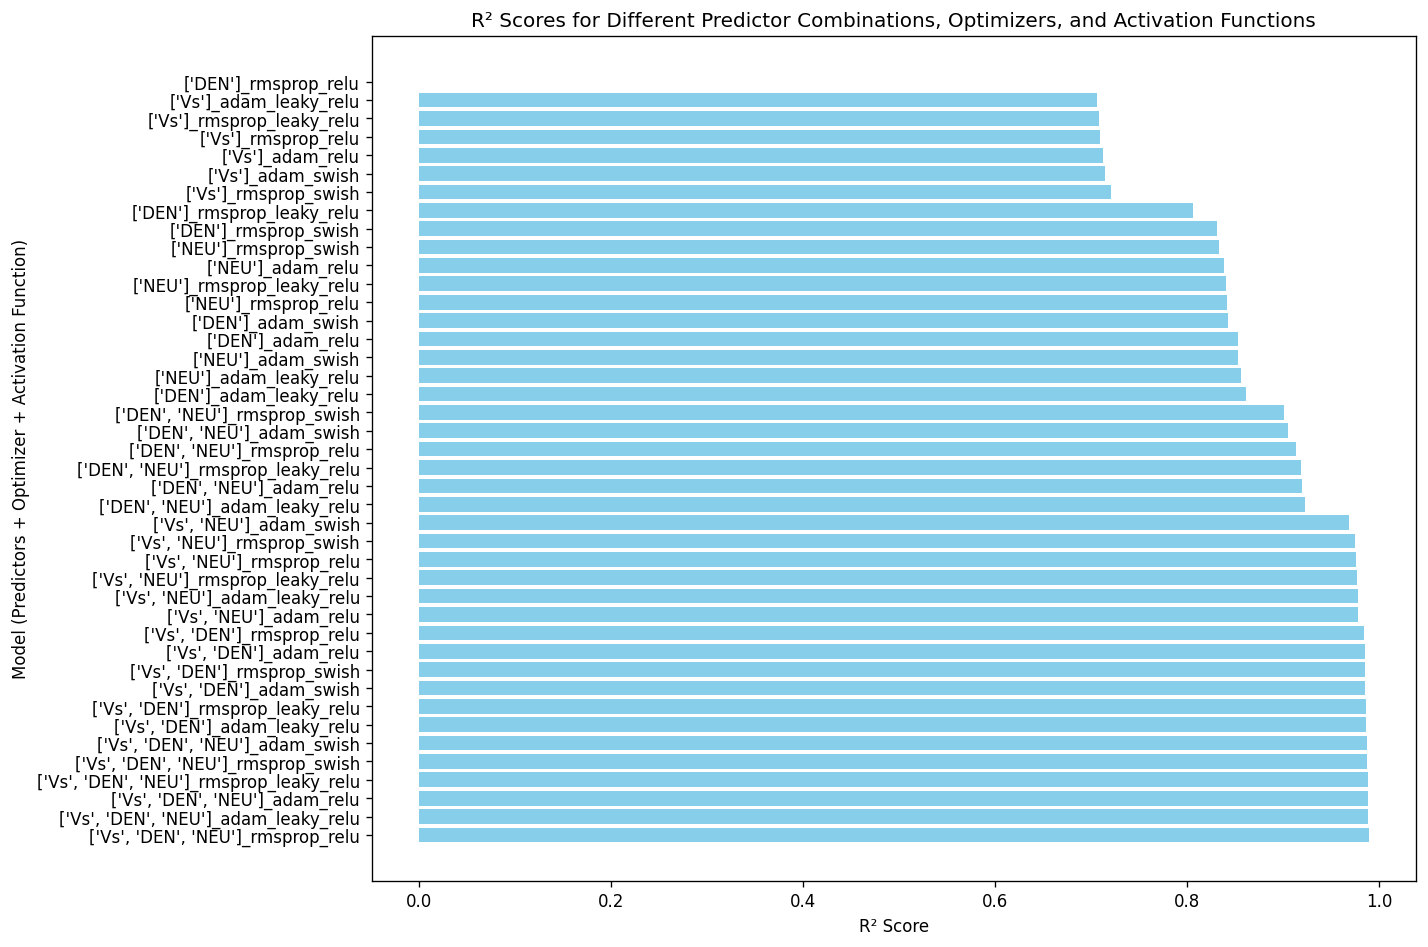

In [4]:
# Create a DataFrame from the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'R2_Score'])

# Sort by R² score (best to worst)
results_df = results_df.sort_values(by='R2_Score', ascending=False).reset_index(drop=True)

# Plot R² scores for all models
plt.figure(figsize=(12, 8), dpi=120)
plt.barh(results_df['Model'], results_df['R2_Score'], color='skyblue')
plt.xlabel('R² Score')
plt.ylabel('Model (Predictors + Optimizer + Activation Function)')
plt.title('R² Scores for Different Predictor Combinations, Optimizers, and Activation Functions')
plt.tight_layout()
plt.show()

Creates a dataframe to store all the $R^2$ scores from the different ADD models, where they are sorted from best to worst. It then generates a bar plot, giving us a visual representations of the different combinations and their respective $R^2$ values. 

The bar plot highlights the performance of different ANN model configurations in predicting the compressional wave velocity (Vp). The results show a clear trend where the models that used only one dataset (e.g., Vs, DEN, or NEU) consistently had the lowest R² scores, regardless of the optimizer or activation function used. 

As we move to models with two datasets, we see a significant improvement in performance. Interestingly, some of these combinations even outperformed models that used all three datasets. This suggests that certain pairs of features may provide complementary information that enhances model accuracy more than using all features in some cases. Or it could mean that certain pairs work worse together, as it seems like it is the trios using the swish activation functions were the ones that were close with the two dataset combinations. 

Nonetheless, the models that utilized all three datasets (Vs, DEN, and NEU) tended to perform the best overall. Among these top-performing models, the optimizer used varied between 'adam' and 'rmsprop,' but activation functions played a noticeable role. The top two models used the 'leaky_relu' activation, while the third and fourth models used 'relu.' This could indicate that while both activation functions performed well, 'leaky_relu' might provide a slight advantage in this context.

c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


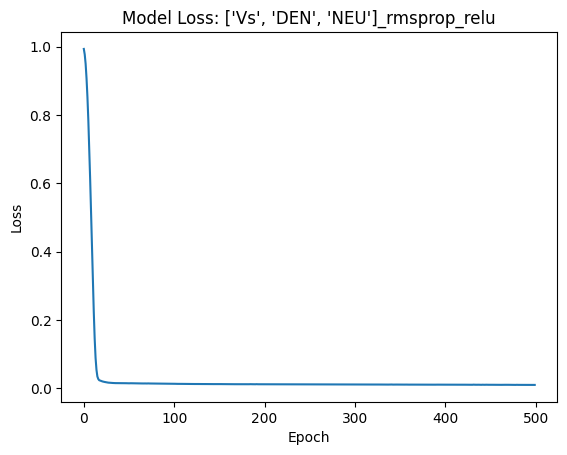

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


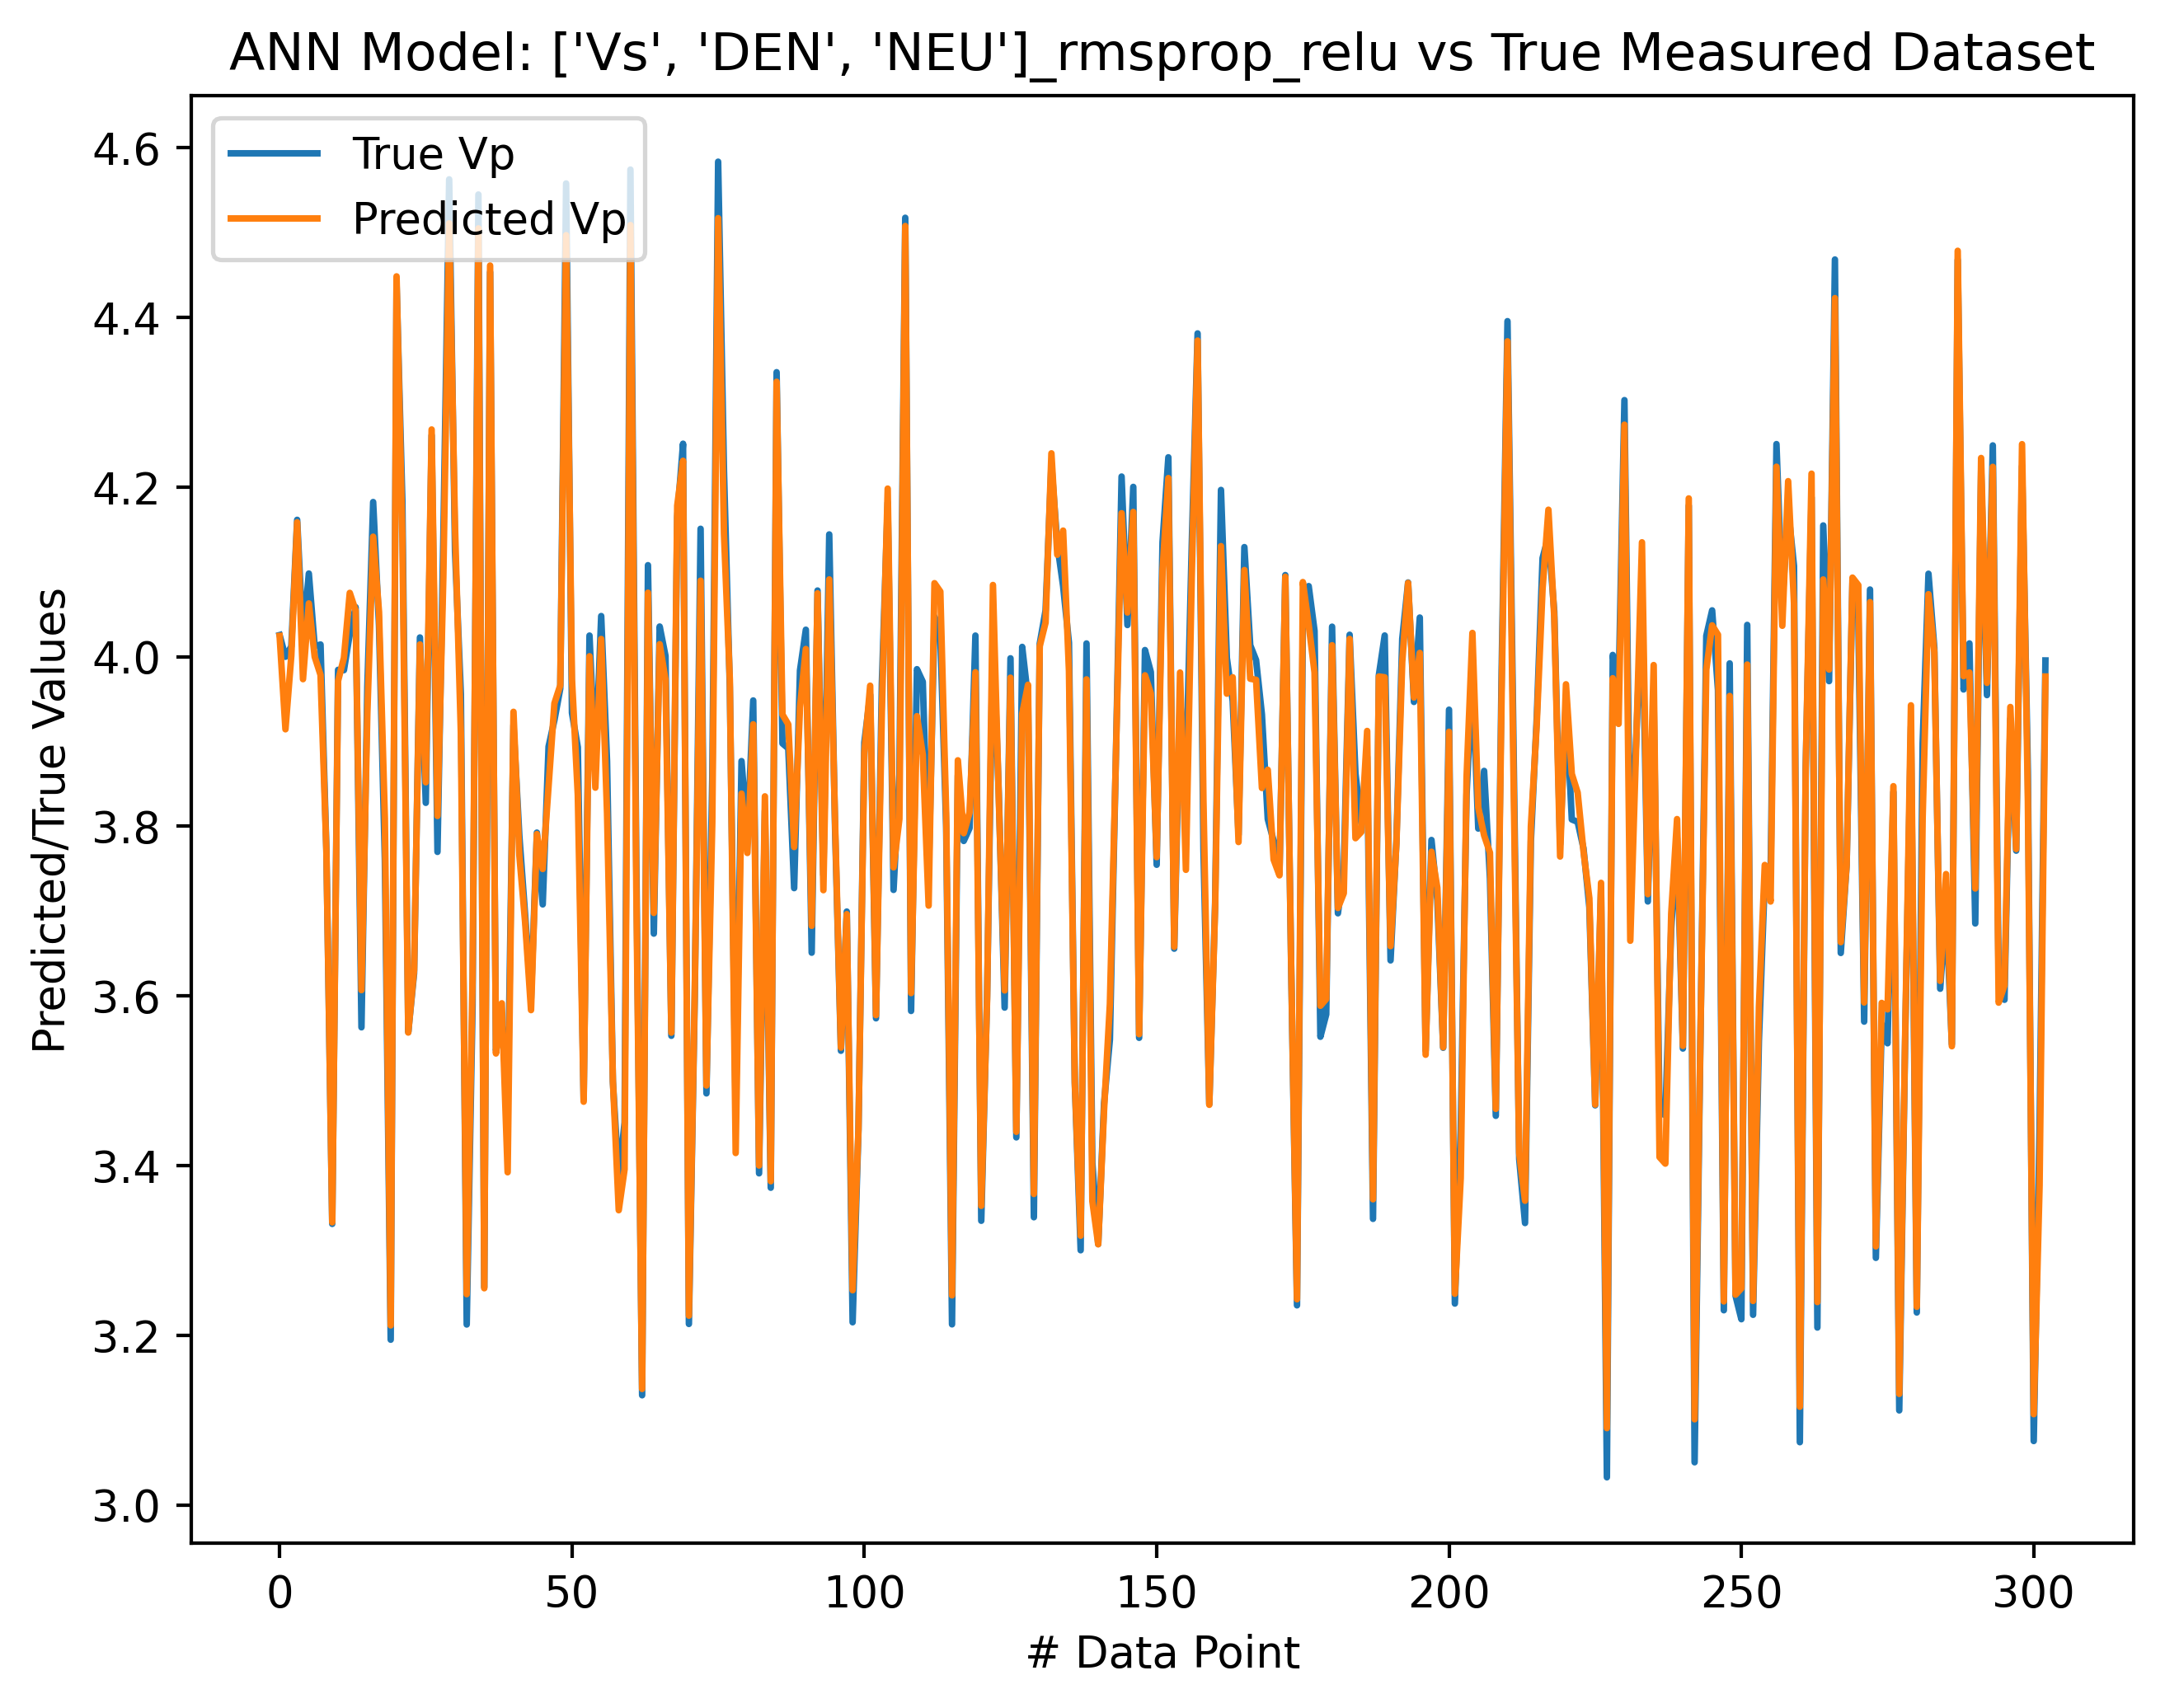

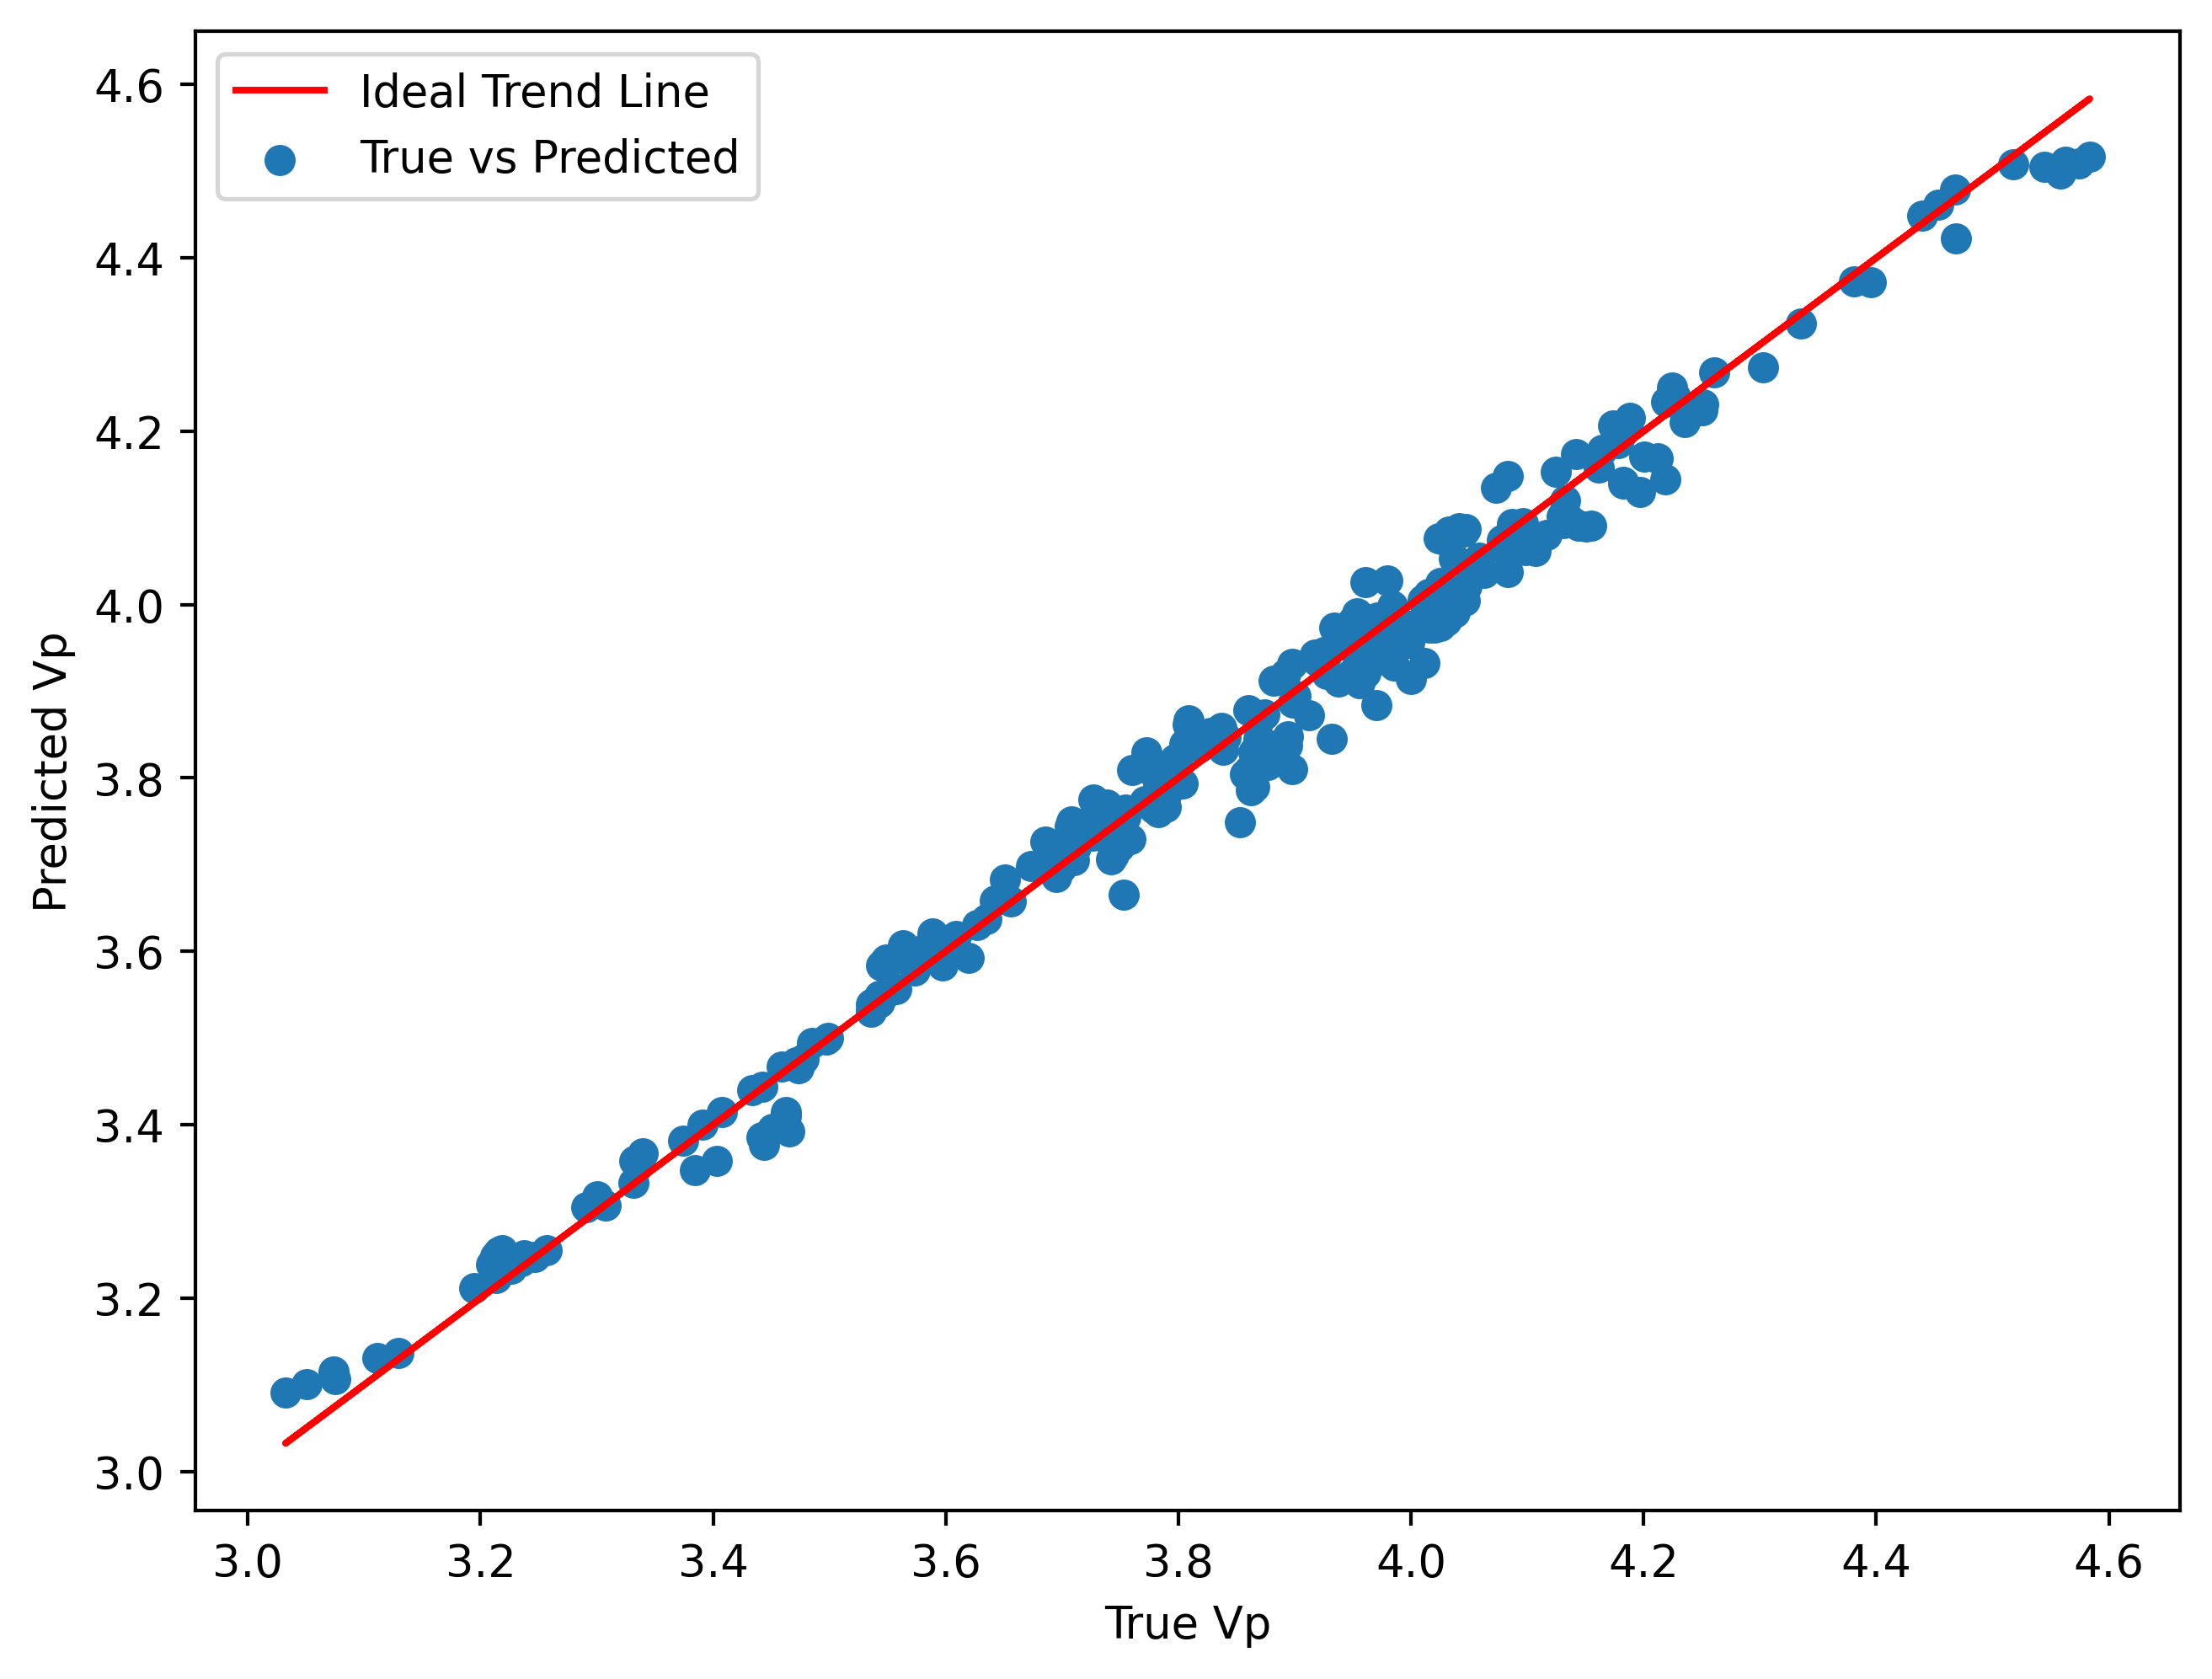

c:\Users\stein\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


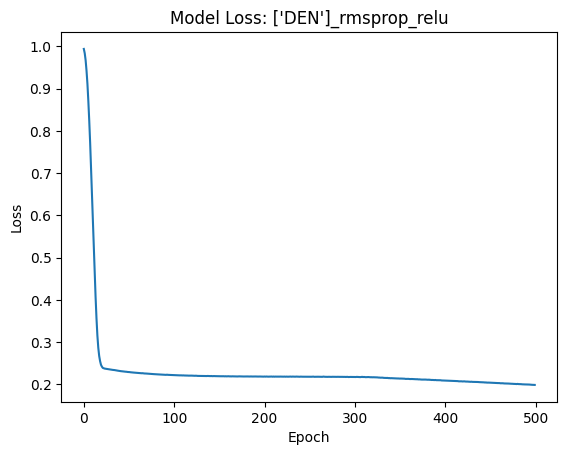

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


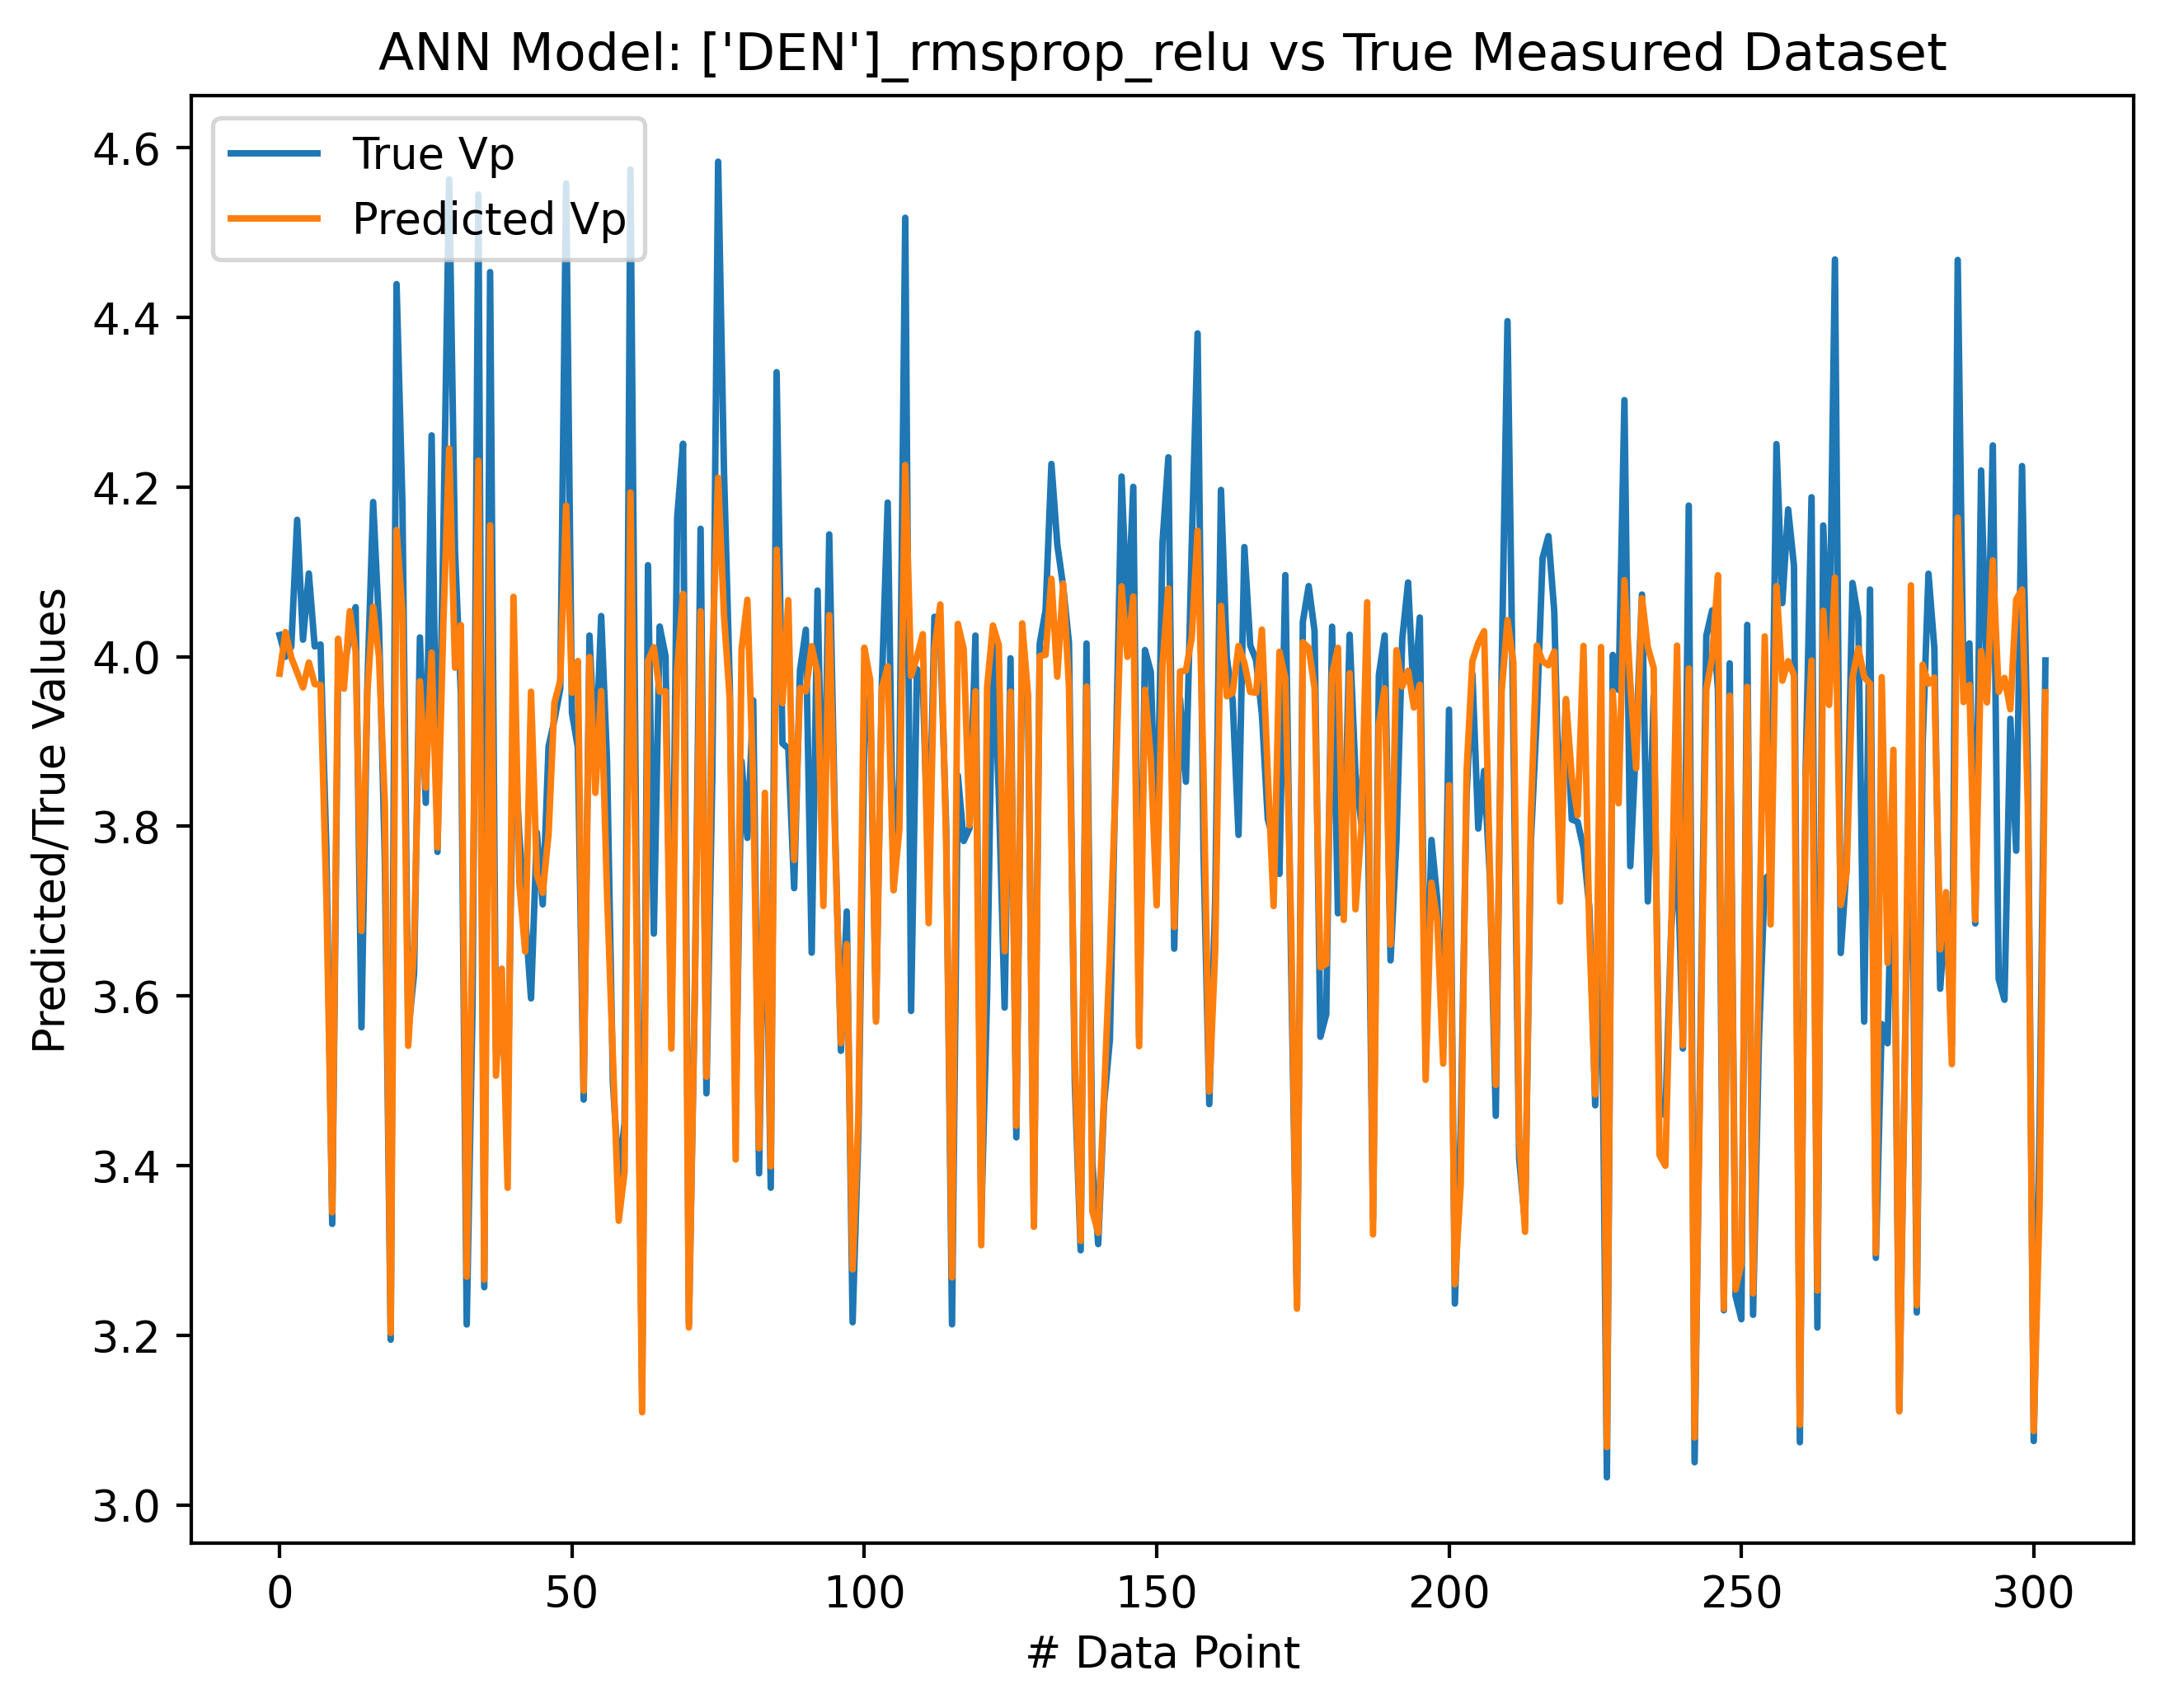

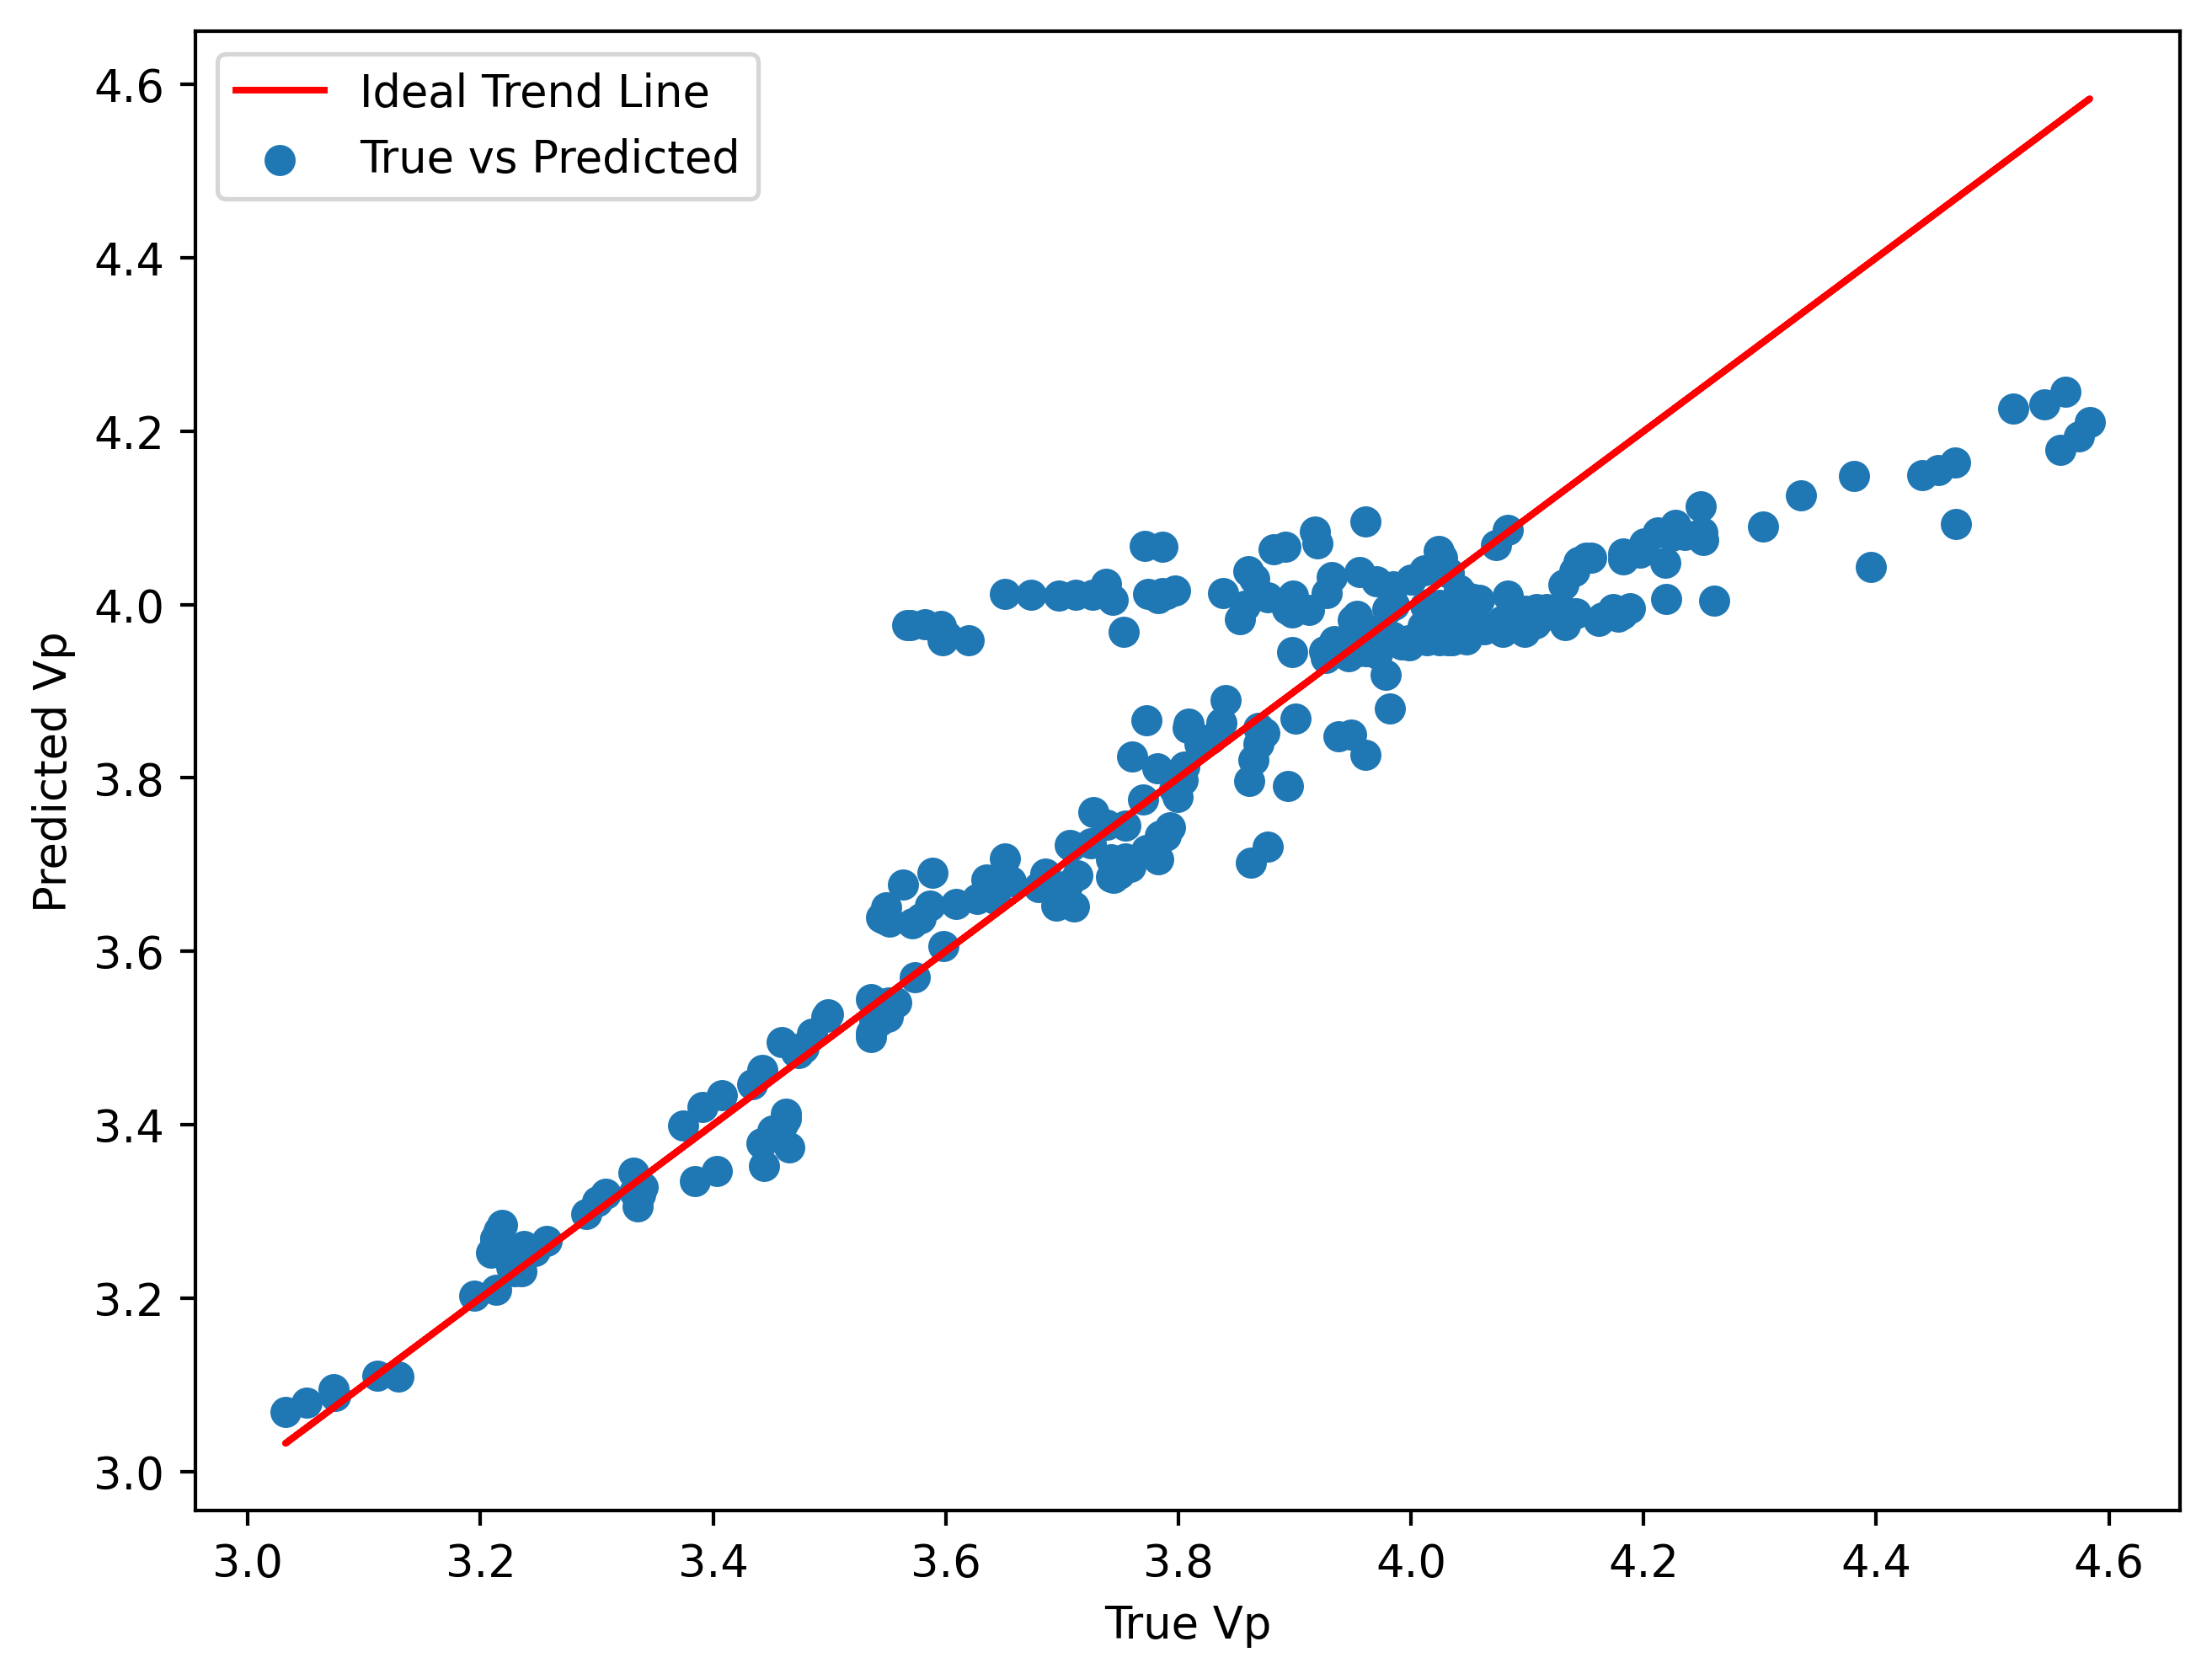

In [8]:
best_model_name = results_df.iloc[0]['Model']
worst_model_name = results_df.iloc[-1]['Model']

for model_name in [best_model_name, worst_model_name]:
    predictor_set, optimizer, activation_func = model_name.split('_', 2)
    
    predictor_set = predictor_set.replace("[", "").replace("]", "").replace("'", "").split(", ")
    
    X = CleanedData[predictor_set].values
    y = CleanedData[TargetVariable].values

    X = PredictorScaler.fit_transform(X)
    y = TargetVarScaler.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = create_ann_model(input_dim=X_train.shape[1], optimizer=optimizer, activation=activation_func)
    history = model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=0)

    plt.plot(history.history['loss'])
    plt.title(f'Model Loss: {model_name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    predictions = model.predict(X_test)
    predictions = TargetVarScaler.inverse_transform(predictions)
    y_test_orig = TargetVarScaler.inverse_transform(y_test)

    plt.figure(figsize=(8, 6), dpi=380)
    plt.plot(y_test_orig)
    plt.plot(predictions)
    plt.title(f'ANN Model: {model_name} vs True Measured Dataset')
    plt.ylabel('Predicted/True Values')
    plt.xlabel('# Data Point')
    plt.legend(['True Vp', 'Predicted Vp'], loc='upper left')
    plt.show()

    plt.figure(figsize=(8, 6), dpi=380)
    plt.plot(y_test_orig, y_test_orig, 'r')
    plt.scatter(y_test_orig, predictions)
    plt.ylabel('Predicted Vp')
    plt.xlabel('True Vp')
    plt.legend(['Ideal Trend Line', 'True vs Predicted'], loc='upper left')
    plt.show()

This section selects the best and worst performing models based on their $R^2$ scores from the previous results. The best_model_name and worst_model_name are identified, and both models are then re-trained using the same dataset. We plot the loss history to show how it evolves during training and we also use plots to see how well its predictions does against the test set. 

We can see here that in the plots for the combination with the best R^2 value, it is fairly close. In the line plot, we see that it follows the pattern of the actual Vp values, showing us that it does a great job of reading the pattern of the data to create a accurate prediction. Proving its usefullness in handling the complex relationships with the values.

In the scatter plot, we see something similar. In this plot, we compare the ANN predictions with the true data, seeing how it looks with the ideal trend line. If the ANN model was perfectly accurate, we would have seen all the points directly on the line. You can see that the points are close to the line, following the guide line closely and showing us that its predictions are not too far off.

We see similarly that the plots from the worst performing one are much worse, the lines being far off in the line plots and the points from the scatterplot being far away from the guide line.

### Conclusion

This section of the project provides a evaluation of multiple Artificial Neural Network (ANN) models to predict Compressional Wave Velocity (Vp) using various combinations of geological features, optimizers, and activation functions.

By testing different predictor sets, optimizers, and activation functions, we were able to analyze how these combinations influence the model’s performance. The bar plot generated from the results demonstrates that models using only one dataset (e.g., Vs, DEN, or NEU) consistently gave the lowest R² scores, regardless of the optimizer or activation function applied. This suggests that single-feature models are insufficient for accurate predictions, compared with using multiple datasets. 

By selecting the best and worst performing models based on R² scores, we were able to look closer at their performance through additional training and testing. The loss history plots shows us that the models continued to improve with training, with loss steadily decreasing over epochs, proving the models' ability to adjust and minimize prediction errors. The predicted vs actual plots validated that the top-performing models were able to closely match the true values of Vp, proving their predictive accuracy.

### Reflections

This part proved to be more difficult than expected, as we managed to read it wrong and thought in the beginning that we were supposed to create only one ANN model. After we realized our mistake, we quickly pivoted and started to work on creating the different ANN models based on the different combinations. It definitely took a lot of time, especially because of the fact that testing and running the code took upwards of 30 minutes every time. So if there is one thing we wish to have changed during our work, it would definitely be to have worked on the task correctly from the beginning. 
As for the task itself, we really enjoyed the concept, creating a Neural Network with a machine learning algorithm, and using it to create a model that predicts accurately was impressive, and it was really interesting to see all the different performance score based on the amount of datasets and which optimizer and activation function that was used. 

### Self reflection: 
Sanjai: I found this task to be more difficult and especially more time consuming than the others. Even though we began work early, because of misunderstandings of the tasks and the amount of time spent on running the code and testing, we ended up with still having much work close to the deadline. One thing i enjoyed more with this project was that it was easier to split up, so we could go through the project together, and then focus on improving each of our part separately, asking each other for help when needed. I especially enjoyed the machine learning aspect of task 4, finding it cool to create a model that learns and improves as it trains and gets tested.

Stein Are: Overall i found this project both very enjoyable and challenging, there were a lot of new challenges in the tasks that i have not done before, so in the start it went a little slow, just getting the hang of what the actual tasks were. Luckily after a while when i had gotten more into it, things went a little easier, like implementing the Gardner method and analyzing the given data. For future projects i need to get into the task faster, read through all the tasks a few more times just so i am sure what the task asks for.

Lars: This project was a bit different from the other projects we have had so far, some parts where good and some could be better.  I really liked how the lectures was connected to the project and how the tasks were. I felt that I learned much in a short period with this project. I did find that locating information about the project was a bit tricky, also we had some info in a presentation, some in word documents, some in a pdf and also some in the python files. This could be better if it was located at the same place.  In all I learned much about data preprocessing and machine learning which I will definitly take with me.

### References

GeeksForGeeks (2024) *Artificial Neural Networks and its Applications* https://www.geeksforgeeks.org/artificial-neural-networks-and-its-applications/

IBM (2024) *What is a neural network?* https://www.ibm.com/topics/neural-networks